In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_=font_manager.FontProperties(fname= 'MALGUNBD.TTF')
rc('font', family=font_.get_name())

In [34]:
def draw_two_plots(title, x_data, max_temp_list1, label_y1, max_temp_list2, label_y2):
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(20,4))
    plt.plot(x_data, max_temp_list1, marker='s', markersize=5, color='b', label = label_y1)
    plt.plot(x_data, max_temp_list2, marker='s', markersize=5, color='r', label = label_y2)
    plt.xticks(x_data)
    plt.ylim(-5, 20)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

2001 년부터 2022 년까지 1 월의 기온 변화
1 월 최저기온 평균 :
-2.9, -1.4, -4.4, -3.3, -3.3, -1.2, -0.7, -2.0, -3.7, -4.3, -6.6, -2.8, -4.5, -1.7, -1.7, -4.2, -3.7, -5.2, -3.5, 0.1, -4.3, -4.1, 
1 월 최고기온 평균 :
4.7, 6.7, 4.3, 6.0, 5.4, 7.0, 8.1, 5.6, 5.8, 5.0, 2.2, 5.1, 4.8, 8.1, 6.8, 4.3, 6.3, 4.0, 7.3, 8.4, 5.9, 6.8, 

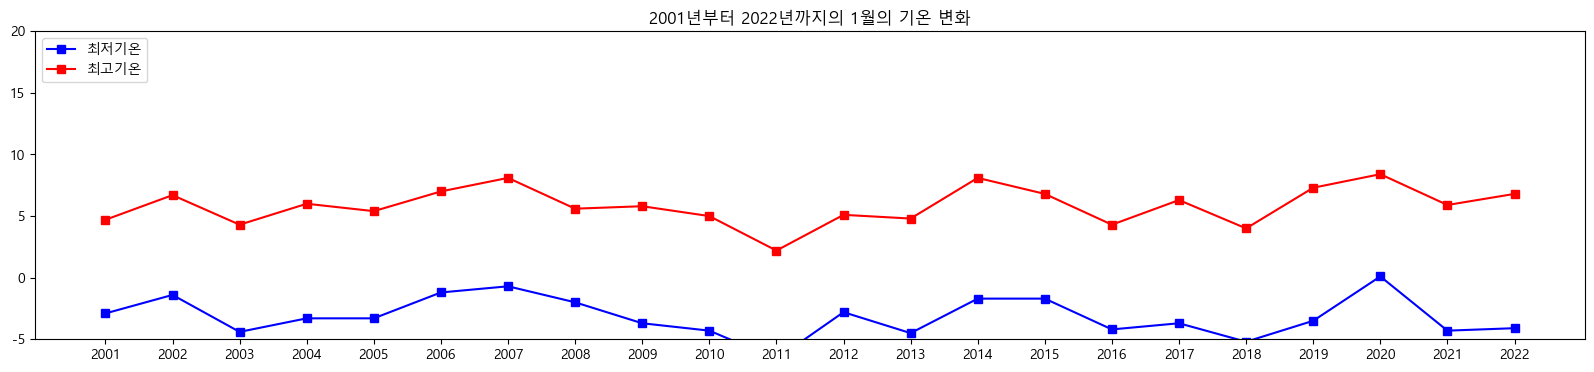

In [35]:
def main():
    start_year = int(input('시작 연도를 입력하세요: '))
    end_year = int(input('마지막 연도를 입력하세요: '))
    search_month = int(input('기온 변화를 측정할 달을 입력하세요: '))
    weather_df = pd.read_csv('daegu-utf8-df.csv', encoding='utf-8')
    weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format='%Y-%m-%d')

    high_temp_mean = []
    low_temp_mean = []
    selected_year_month_df = weather_df.loc[(weather_df['날짜'].dt.year >= start_year) & (weather_df['날짜'].dt.year <= end_year) & (weather_df['날짜'].dt.month == search_month)]
    for i in range (start_year,end_year+1):
        high_temp_mean.append(selected_year_month_df.loc[selected_year_month_df['날짜'].dt.year == i,'최고기온'])
        low_temp_mean.append(selected_year_month_df.loc[selected_year_month_df['날짜'].dt.year == i,'최저기온'])
    for i in range(len(high_temp_mean)):
        high_temp_mean[i] = round(high_temp_mean[i].mean(),1)    
        low_temp_mean[i] = round(low_temp_mean[i].mean(),1)
    print(f'{start_year} 년부터 {end_year} 년까지 {search_month} 월의 기온 변화')
    print(f'{search_month} 월 최저기온 평균 :')
    for i in range (len(low_temp_mean)):
        print(f'{low_temp_mean[i]}',end=', ')
    print(f'\n{search_month} 월 최고기온 평균 :')
    for i in range (len(high_temp_mean)):
        print(f'{high_temp_mean[i]}',end=', ')
    
    
    x_data = [i for i in range (start_year,end_year+1)]
    draw_two_plots(f'{start_year}년부터 {end_year}년까지의 {search_month}월의 기온 변화',x_data,
                   low_temp_mean, '최저기온',
                   high_temp_mean, '최고기온')

main()